IMPORT DEPENDENCIES

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image as pillow

READ AND DISPLAY IMAGE

In [60]:
image = cv2.imread("blue_image_pizza.jpg")
print(f"Image dimension: {image.shape} \nImage type: {type(image)}")

Image dimension: (360, 480, 3) 
Image type: <class 'numpy.ndarray'>


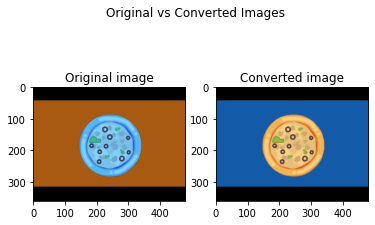

In [61]:
# make a copy of the image
image_copy = np.copy(image)

# change colour scheme of image
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# display original image
figure, axis = plt.subplots(1, 2)
figure.suptitle("Original vs Converted Images")
axis[0].set_title("Original image")
axis[0].imshow(image)

# display converted image
axis[1].set_title("Converted image")
axis[1].imshow(image_copy)

DEFINE COLOUR THRESHOLD

In [62]:
lower_threshold = np.array([0, 0, 150])
upper_threshold = np.array([100, 100, 255])

CREATE AN OVERLAY MASK

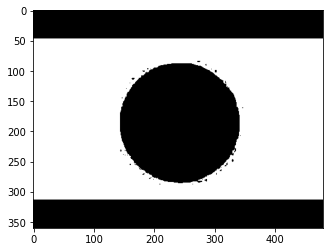

In [63]:
mask = cv2.inRange(image_copy, lower_threshold, upper_threshold)

#visualize the mask
plt.imshow(mask, cmap="gray")

In [64]:
 # mask another image with this mask to allow the pizza to show
# while blocking out the other part of the image
# show the black part leave out the white part

# Create a copy of the image to use for masking
masked_image = np.copy(image_copy)

# confirm that the masked image is gray scale (black and white)
print(f"Image dimension: {mask.shape} \nImage type: {type(mask)}")

Image dimension: (360, 480) 
Image type: <class 'numpy.ndarray'>


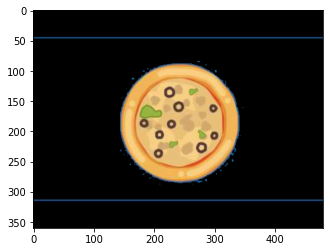

In [65]:
masked_image[mask != 0] = [0, 0, 0]

# show the new masked image
plt.imshow(masked_image)

SUPER-IMPOSE THE MASKED PIZZA IMAGE ON A SPACE IMAGE

In [95]:
# show the dimension of the image
space_image = cv2.imread("space.jpg")
print(f"Image dimension: {space_image.shape} \nImage type: {type(space_image)}")

Image dimension: (183, 275, 3) 
Image type: <class 'numpy.ndarray'>


In [106]:
# Pre-process the space image to be the same 
# width and height as the pizza image
superimposed_image = pillow.open("space.jpg")
superimposed_image = superimposed_image.resize((image_copy.shape[:-1]))
superimposed_image.save("space_copy.jpg")

In [104]:
# Read in the saved copy of the superimposed image
superimposed_copy = cv2.imread("space_copy.jpg")

# change colour scheme of image
final_copy = np.copy(superimposed_copy)
# final_copy = cv2.cvtColor(final_copy, cv2.COLOR_BGR2RGB)

# print the dimension of the image
print(f"Dimension: {final_copy.shape}")

Dimension: (360, 480, 3)


In [98]:
# Set the pizza area in the superimposed copy to 0's
final_copy[mask == 0] = [0, 0, 0]

# Now superimpose the pizza with the superimposed_copy
final_copy = superimposed_copy + masked_image

IndexError: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 360